<a href="https://colab.research.google.com/github/sushi199/cot_proj/blob/main/Greedy_Approach_Graph_Coloring_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#__Greedy Approach - Graph Coloring Problem__


## Description

The Graph Coloring Problem is a problem where a graph of n vertices and m edges is colored so each vertex receives a color. This color is selected such that no adjacent vertices share the selected color. This does not mean that colors cannot be reused, but no adjacent vertices can be colored the same. Please note that this algorithm can produce multiple results.

### Constraints

* Adjacent vertices cannot have the same color
* Each vertex must receive a color

###Sample Input

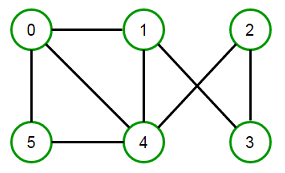


###Sample Output

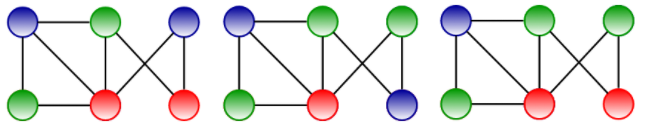


 ## Visuals to Describe the Problem
Example Solution for Input Graph:

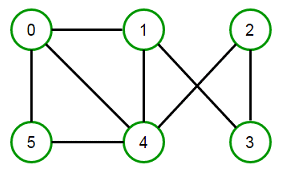



## Brute Force Solution

The brute force solution for the Graph Coloring problem is to check each vertex with all other vertices and assign a color that is not the same as the adjacent vertices.

### The asymptotic complexity of the brute force solution

The asymptotic complexity of the brute force solution for the Graph Coloring problem is k^n, where k is the number of colors in the graph. This time complexity is derived from checking every combination of vertices and colors.

The space complexity of the brute force solution is O(n) because each vertex's color must be stored in some data structure for reference when choosing other vertices' colors.

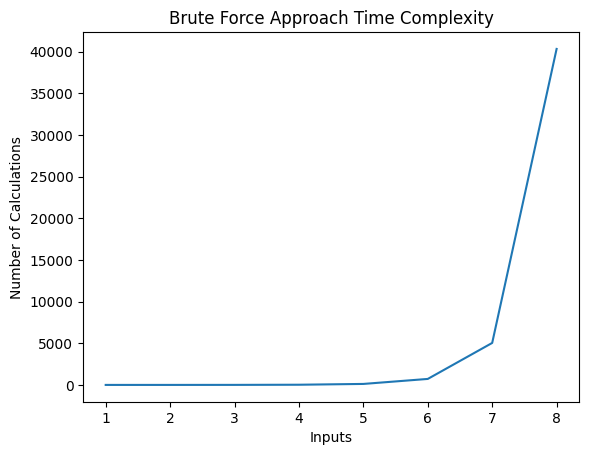

In [1]:
# Graph showing the Brute Force Approach time complexity
import matplotlib.pyplot as plt
import math

x = []
y = []

for i in range(1, 9):
  x.append(i)
  y.append(math.factorial(i))

plt.plot(x, y)
plt.title("Brute Force Approach Time Complexity")
plt.xlabel("Inputs")
plt.ylabel("Number of Calculations")
plt.show()

## Steps of the Greedy Approach

Graph Coloring Problem

### Step 1: Selection Procedure

For some vertex in the set of vertices V on a graph, choose the color at the lowest index from the colors data structure, or the 'smallest' color.

### Step 2: Feasibility Check

Check that no adjacent vertices share the chosen color. If any do, return to the selection procedure and choose the next 'smallest' color.

### Step 3: Solution Check

Once all vertices in V are assigned a color that is not the same as their adjacent vertices, the problem is solved.


## Pseudocode of the solution using the Greedy Approach

```
colorGraph(Graph V, number of vertices n) {
	create ‘result’ data structure to keep track of vertex colors;
	for each vertex until  vn {
		create ‘assigned’ data structure for adjacent vertex colors for V[i];
		for each adjacent vertex to vi {
			if this vertex exists in ‘result’
				add it to ‘assigned’;
		}
		initialize ‘color’ to 1;
		for ‘color’ in assigned {
			if ‘color’ does not equal assigned vertex’s color
				break;
			else
				increment ‘color’ by 1;
		}
		assign ‘color’ to ‘result’ for this iteration;
  }
}
```



## Python Implementation

In [2]:
import time # Used to delay output

class Graph:
 def __init__(self, edges, n, flag):
  self.adj = [[] for _ in range(n)]
  # add edges to the undirected graph
  for (src, dest) in edges:
   self.adj[src].append(dest)
   self.adj[dest].append(src)
   if flag == 1:
     print(f"Edge[{src}, {dest}] has been added to the graph.")
     time.sleep(1)

# Function to assign colors to vertices of a graph
def colorGraph(graph, n, flag):
 colors = ["", "BLUE", "GREEN", "RED", "YELLOW", "ORANGE", "PINK",
     "BLACK", "BROWN", "WHITE", "PURPLE", "VOILET"]
 # keep track of the color assigned to each vertex
 result = {}
 # assign a color to vertex one by one
 for u in range(n):
  # check colors of adjacent vertices of `u` and store them in a set
  assigned = set([result.get(i) for i in graph.adj[u] if i in result])
  # check for the first free color
  color = 1
  for c in assigned:
   if color != c:
    break
   color = color + 1
  # assign vertex `u` the first available color
  result[u] = color
 if flag == 1:
   print("")
 for v in range(n):
  if flag == 1:
    print(f"Color assigned to vertex {v} is {colors[result[v]]}")
    time.sleep(1)

###Driver Code

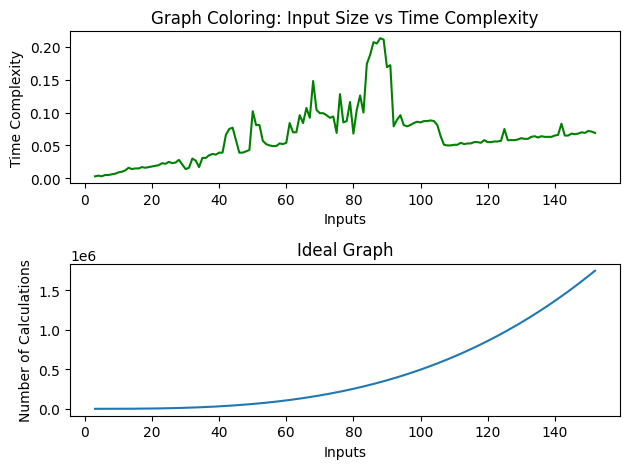

In [3]:
import matplotlib.pyplot as plt # Used for graphing
import timeit # Used to measure time complexity

num = 150 # Number of iterations to time
size = 3 # Starting input size that increases with each iteration
x = [] # x-axis is input size in nodes, nodes and edges will be same in this case
y = [] # y-axis is time complexity
a = [] # Used to store ideal graph

for i in range(0, num): # Do 'n' number of timed trials
    edges = [[0 for columns in range(2)] for rows in range(size)] # Create 2D list with 2 columns and 'size' rows
    for j in range(0, size): # Create 'n' number of nodes
        if j != size - 1: # Graph will have n edges and n nodes for n > 2
            edges[j][0] = j # n = 0, [[n, n + 1], [n + 2, n + 3], ... , [0, n + size]]
            edges[j][1] = j + 1
        else:
            edges[j][0] = 0 # Number on left of [] must be < number on right i.e. [0, 3]
            edges[j][1] = j
    setup = """
from __main__ import Graph, colorGraph, edges, size
graph = Graph(edges, size, 0)
"""
    x.append(size) # Add total number of nodes to keep track of current iteration on graph
    y.append(round(timeit.timeit(setup = setup, stmt = "colorGraph(graph, size, 0)", number = 1000), 3)) # Time the colorGraph() and add result to y
    a.append(size * (size * ((size - 1 ) / 2))) # Take ideal complexity and add to a
    size += 1

figure, axis = plt.subplots(2, 1) # Create subplots to make two graphs
axis[0].plot(x, y, color = "green") # Plot input size vs time complexity
axis[0].set_title("Graph Coloring: Input Size vs Time Complexity")
axis[0].set_xlabel("Inputs")
axis[0].set_ylabel("Time Complexity")

axis[1].plot(x, a) # Plot ideal graph
axis[1].set_title("Ideal Graph")
axis[1].set_xlabel("Inputs")
axis[1].set_ylabel("Number of Calculations")

figure.tight_layout()
plt.show()

#### Demo

In [4]:
# Demo to show the process of how the graph is colored

edges = [[0, 1], [0, 4], [0, 5], [1, 3], [2, 4], [2, 3], [1, 4], [4, 5]]
graph = Graph(edges, 8, 1)
colorGraph(graph, 8, 1)

Edge[0, 1] has been added to the graph.
Edge[0, 4] has been added to the graph.
Edge[0, 5] has been added to the graph.
Edge[1, 3] has been added to the graph.
Edge[2, 4] has been added to the graph.
Edge[2, 3] has been added to the graph.
Edge[1, 4] has been added to the graph.
Edge[4, 5] has been added to the graph.

Color assigned to vertex 0 is BLUE
Color assigned to vertex 1 is GREEN
Color assigned to vertex 2 is BLUE
Color assigned to vertex 3 is RED
Color assigned to vertex 4 is RED
Color assigned to vertex 5 is GREEN
Color assigned to vertex 6 is BLUE
Color assigned to vertex 7 is BLUE


##The asymptotic complexity analysis of the Greedy Approach solution

The asymptotic complexity of the Greedy Approach to the Graph Coloring problem is O(n*m), where n is the number of vertices in the graph and m is the number of edges in the graph. This is the time complexity because the greedy approach ensures that each vertex will only be checked a maximum of n times, and once a vertex is assigned a color, it will not be revisited. That is, the number of checks will be at most the number of vertices times the number of edges.

The space complexity of this problem is O(n) because the colors must be stored in a data structure for the algorithm to reference.

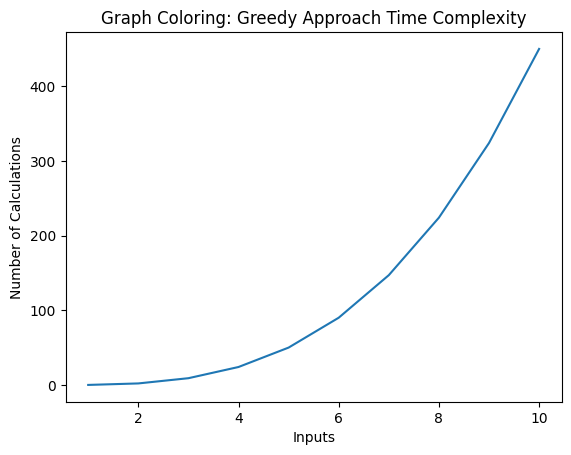

In [5]:
# Graph showing Greedy Approach time complexity
# Note: Assumes every node is connected to every other node
import matplotlib.pyplot as plt

x = []
y = []

for i in range(1, 11):
  x.append(i)
  y.append(i * ((i * (i - 1)) / 2))

plt.plot(x, y)
plt.title("Graph Coloring: Greedy Approach Time Complexity")
plt.xlabel("Inputs")
plt.ylabel("Number of Calculations")
plt.show()

## Application Areas

The Graph Coloring problem is useful for real-life applications where related data may not overlap. Examples of these are Sudoku puzzles, event scheduling, etc.


## References

1.   https://www.techiedelight.com/greedy-coloring-graph/



### Prepared by: _Taylor Preston_
### Edited by: _Taylor Preston_ and _Joshua Murphy_